### Fische

In diesem Datenset sind verschiedene Fischarten vorhanden.

Beschreibung der Daten:

| Name | Beschreibung |
|---|---|
| Species | Name der Fischart |
| Weight | Gewicht des Fisches in gr |
| Length1 | Vertikale Länge des Fisches in cm |
| Length2 | Diagonale Länge des Fisches in cm |
| Length3 | Querschnitt des Fisches in cm |
| Height | Größe des Fisches in cm |
| Width | Breite des Fisches in cm |

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [2]:
# load data
df = pd.read_csv("D:/Data Science/Bigdata/fish.csv")

### Durchführung Data Minung & EDA

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
# rename Length1 + 2 + 3 in Vertical, Diagonal and Cross
df = df.rename(columns={"Length1": "Vertical", "Length2": "Diagonal", "Length3": "Cross"})

In [7]:
df

,Species,Weight,Vertical,Diagonal,Cross,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### Fertigen Sie ein Pairplot mit Unterscheidung der Species an. Diskutieren Sie das Ergebnis.

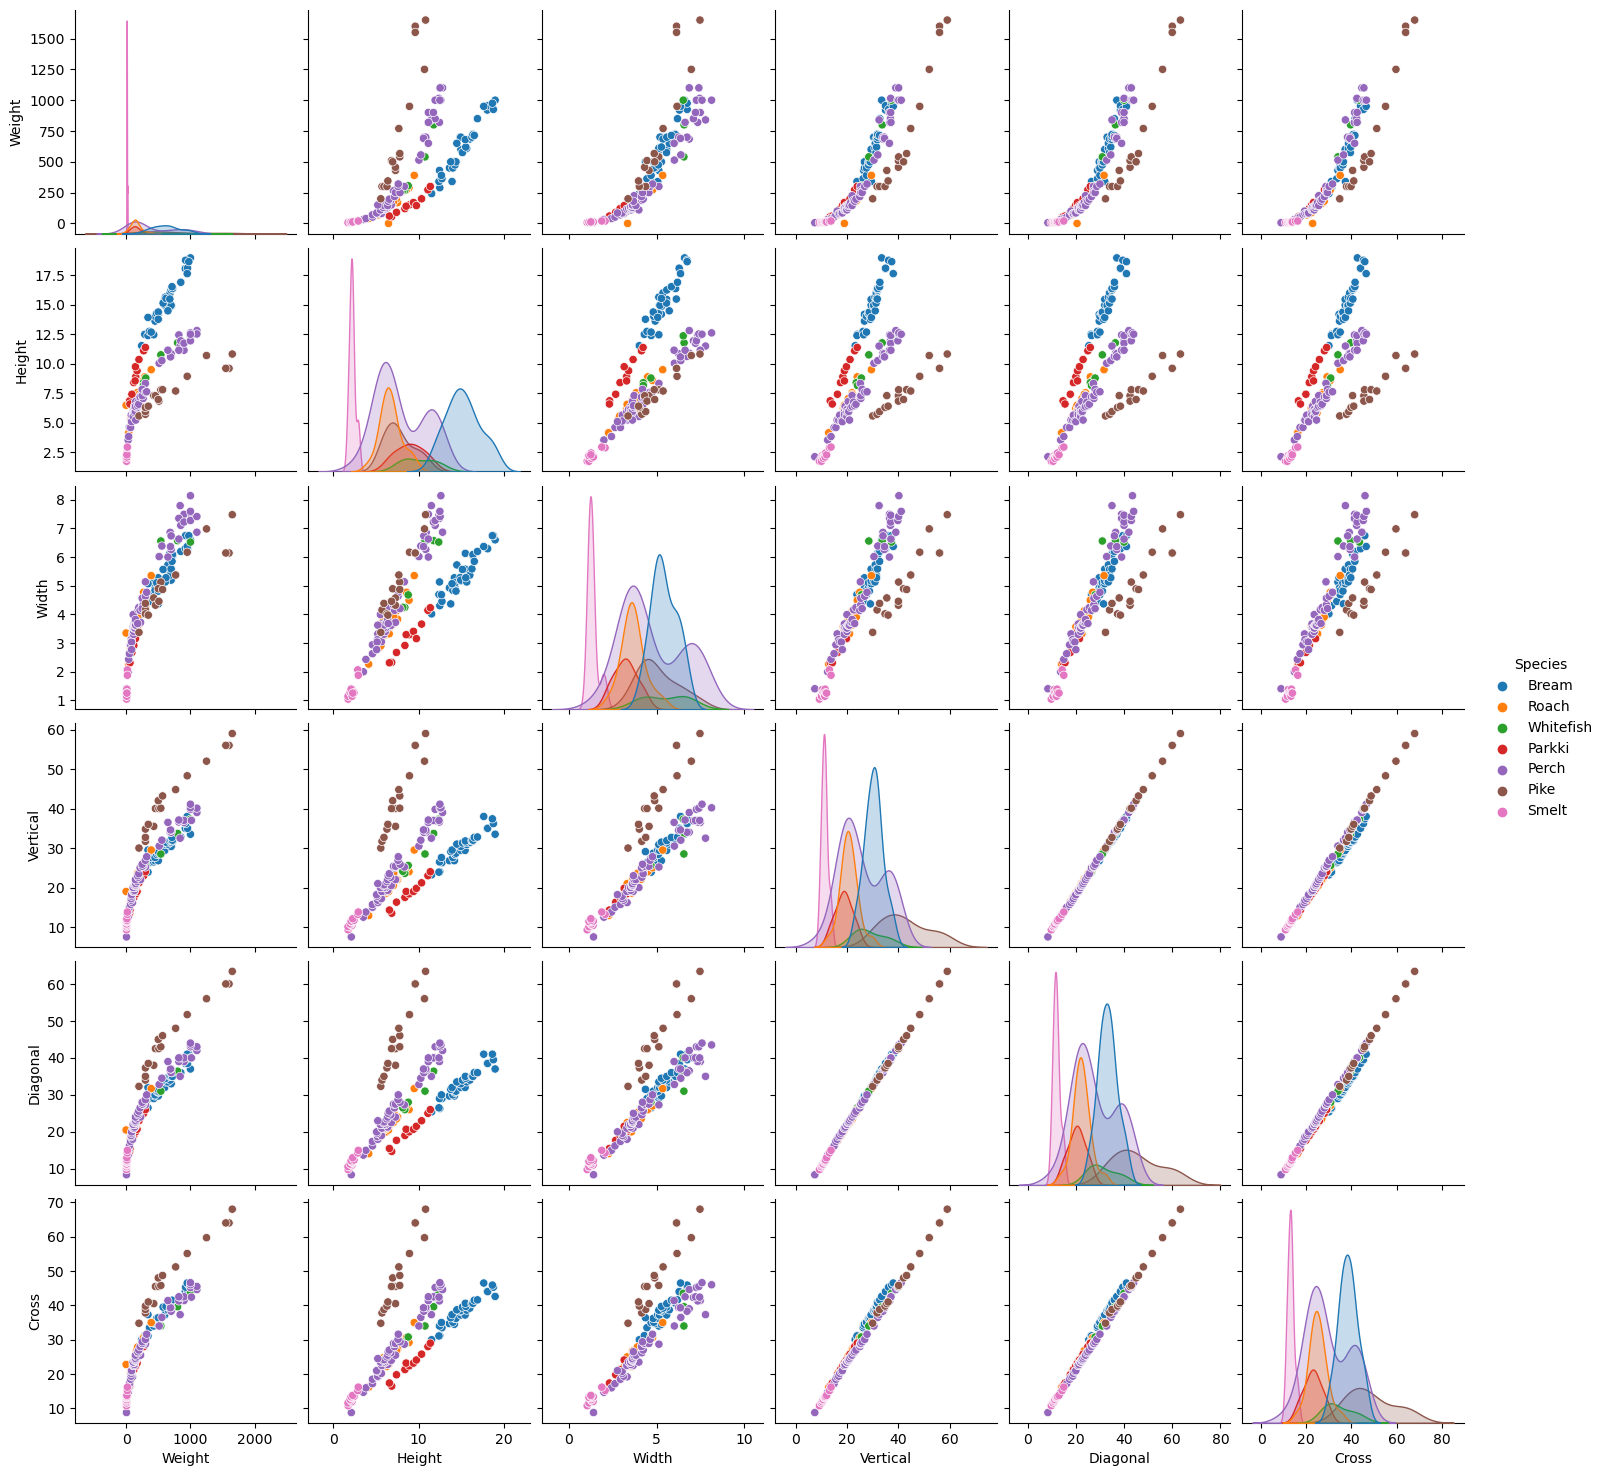

In [8]:
sns.pairplot(df, hue="Species", vars=["Weight", "Height", "Width", "Vertical", "Diagonal", "Cross"])

### Erstellen Sie je Species eine Correlationsmatrix visuell (wenn möglich Subplots verwenden). Werden Ihre Annahmen von dem Pairplot bestätigt?

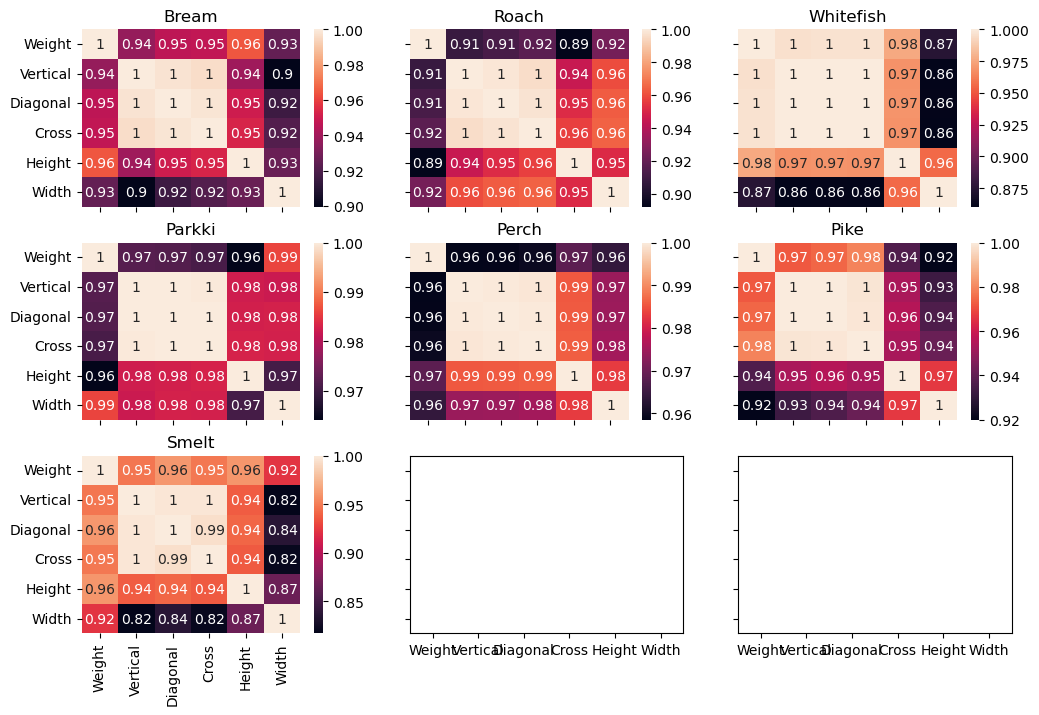

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True, sharex=True)
j = 0
for i, specie in enumerate(df.Species.unique()):
    sns.heatmap(df.loc[df["Species"] == specie].corr(), annot=True, ax=axes[j, i%3])
    axes[j, i%3].set_title(specie)
    if i%3 == 2: j += 1

### Wieviel Fische je Fischart existieren? Erstellen Sie ein Pie-Plot und eine deskriptive Statistik.

In [10]:
fishes = df.groupby("Species").count()["Weight"]
fishes

Species
Bream        35
Parkki       11
Perch        56
Pike         17
Roach        20
Smelt        14
Whitefish     6
Name: Weight, dtype: int64

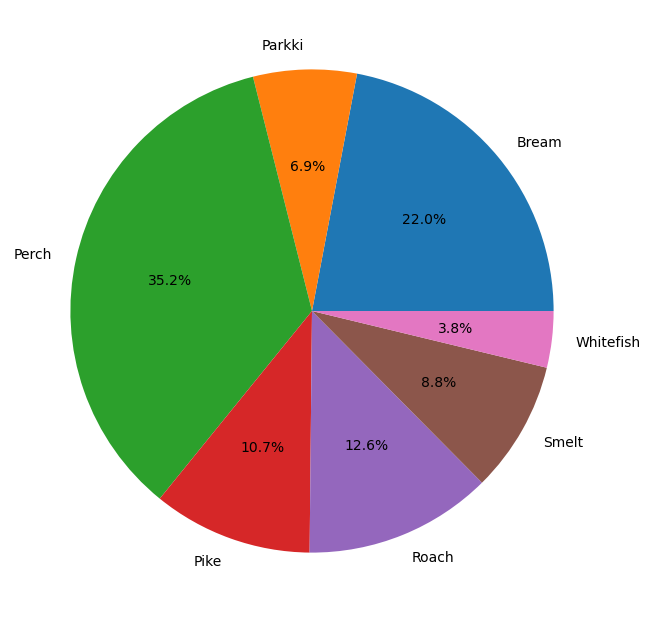

In [11]:
labels = sorted(list(df.Species.unique()))
fig1, ax1 = plt.subplots()
ax1.pie(fishes, labels=labels, autopct='%1.1f%%');

### Erstellen Sie für Weight, Vertical, Diagonal, Cross, Height und " je ein Plot indem je Species die Ausreißer feststellbar sind.

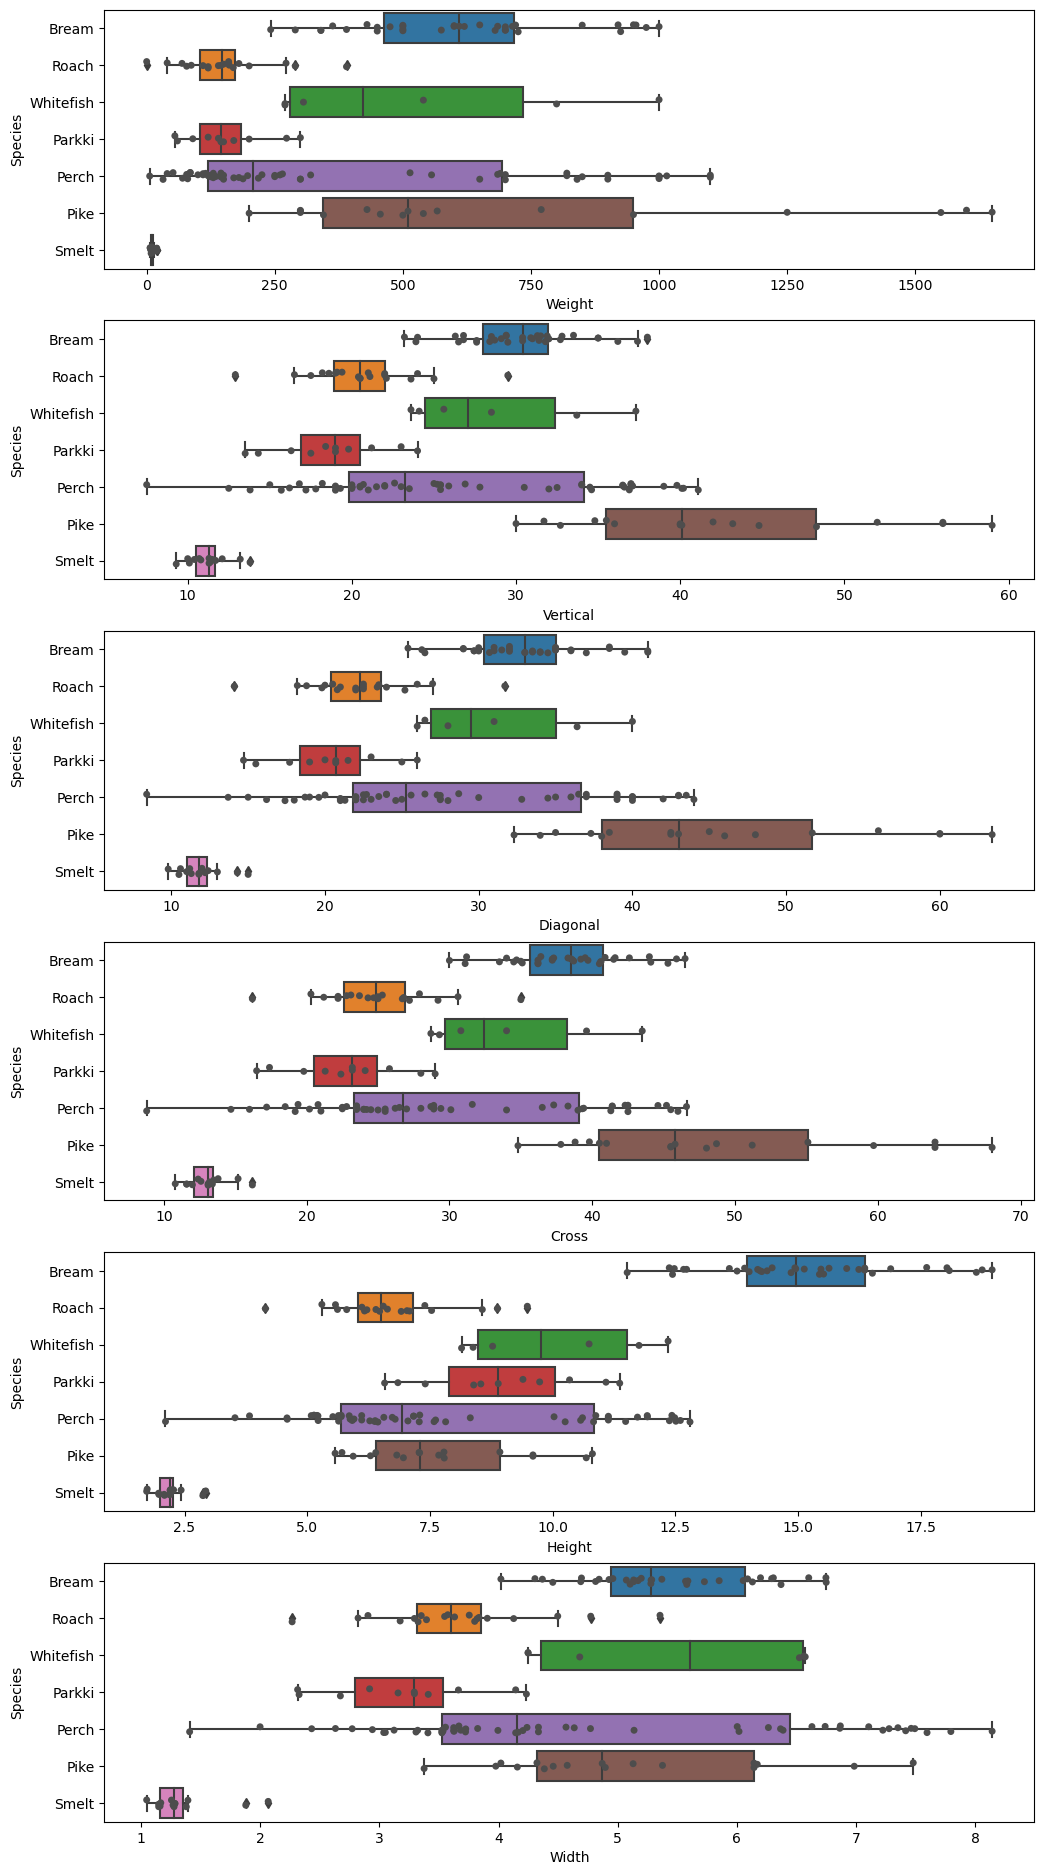

In [12]:
plt.rcParams['figure.figsize'] = [12, 24]
sizes = ["Weight", "Vertical", "Diagonal", "Cross", "Height", "Width"]
fig, axes = plt.subplots(nrows=6, ncols=1)

for i, size in enumerate(sizes):
    sns.boxplot(x=size, y="Species", data=df, ax=axes[i])
    sns.stripplot(x=size, y="Species", data=df, color=".3", ax=axes[i])

### Versuchen Sie 3 "lmplot" in ein Subplot darzustellen (z.B. Vertical/Weight, Diagonal/Height und Width/Weight. Jeweils in Unterscheidung mit Species)

Hinweis: der lmplot akzeptiert nicht ax. Daher muss eine andere Lösung gefunden werden. Dauert vermutlich etwas länger. Daher diese Aufgabe erst als Zusatz machen.

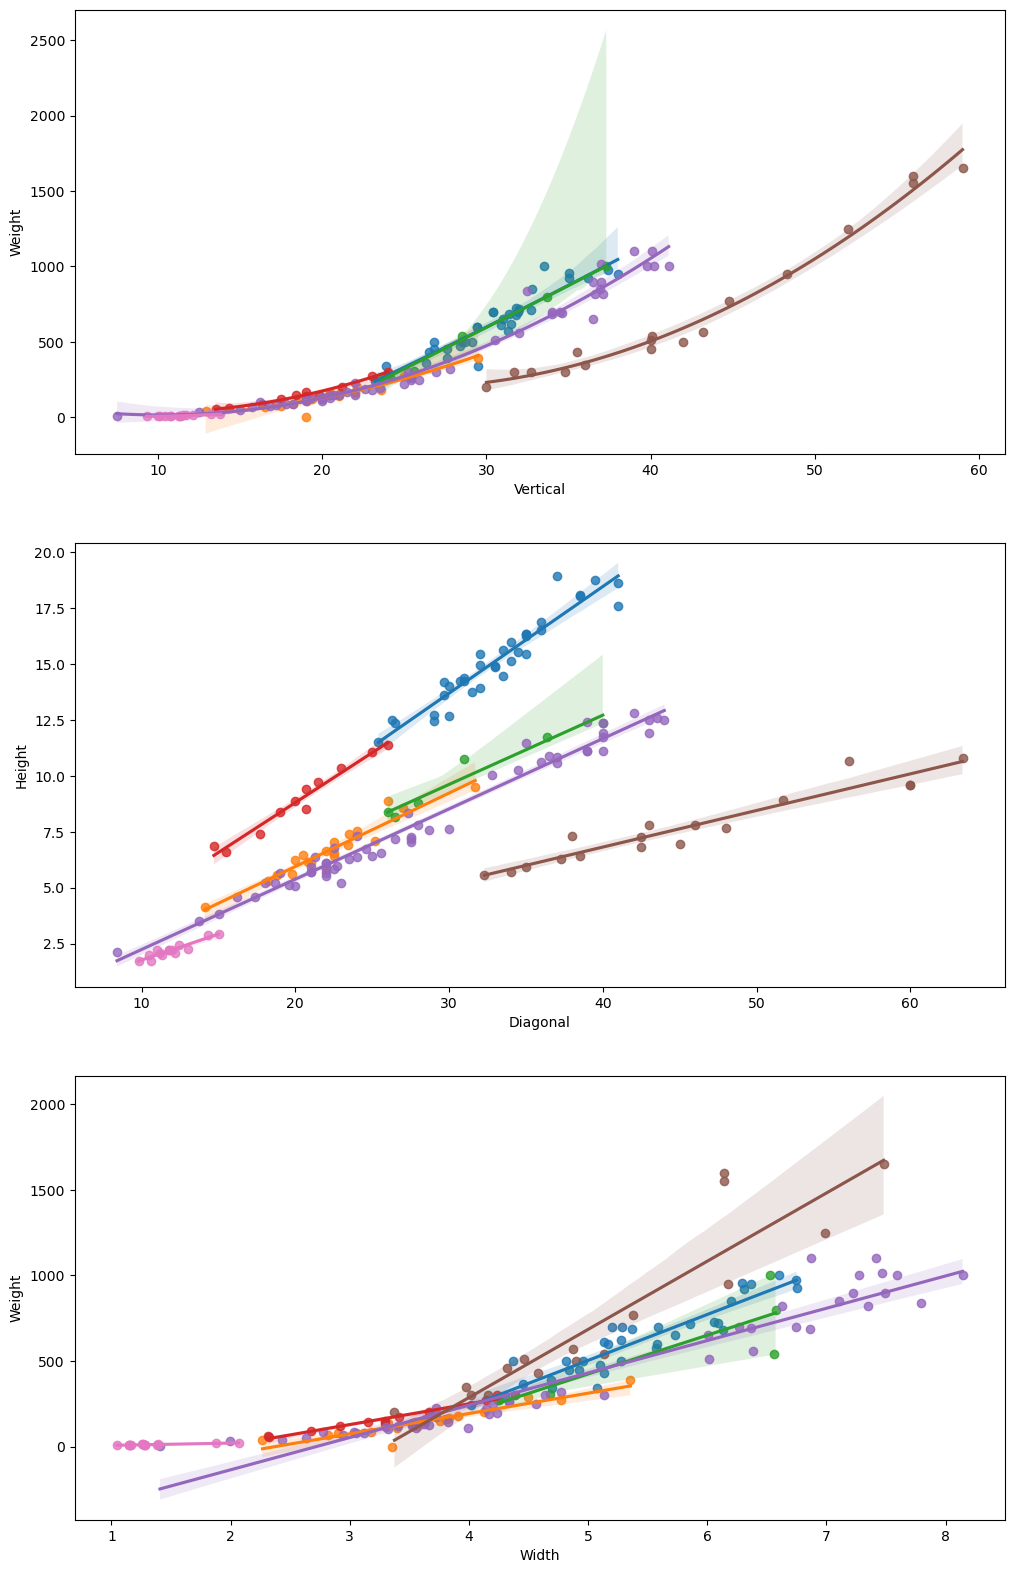

In [13]:
plt.rcParams['figure.figsize'] = [12, 20]

sizes1 = ["Vertical", "Diagonal", "Width"]
sizes2 = ["Weight", "Height", "Weight"]

fig, axes = plt.subplots(nrows=3, ncols=1)
for i, (size1, size2) in enumerate(zip(sizes1, sizes2)):
    for specie in df.Species.unique():
        if i == 0:
            sns.regplot(x=size1, y=size2, data=df.loc[df["Species"] == specie], order=2, ax=axes[i])
        else:
            sns.regplot(x=size1, y=size2, data=df.loc[df["Species"] == specie], order=1, ax=axes[i])

## Hypothese

Wenn wir auf die Vertikale Länge jeder Fischart schauen, unterscheiden sich die Fischarten nicht signifikant. Signifikanzniveau: 5 %

**Hypothese**: Unsere Fischarten haben die gleichen Mittelwerte bei dem Merkmal Vertikale Länge.

In [14]:
df_species = []
for specie in df.Species.unique():
    df_species.append(df.loc[df["Species"] == specie].drop(columns=["Species", "Vertical", "Cross"]))
res = stats.f_oneway(*df_species)
res

F_onewayResult(statistic=array([14.95248684, 39.61838421, 78.84596743, 23.46513207]), pvalue=array([2.11265310e-13, 9.53034394e-29, 3.70172329e-44, 1.64252856e-19]))

## Untersuchung mit Merkmal "Height"

In [15]:
Bream=df[df.Species=='Bream'].drop('Species', axis=1)
Roach=df[df.Species=='Roach'].drop('Species', axis=1)
Whitefish=df[df.Species=='Whitefish'].drop('Species', axis=1)
Parkki=df[df.Species=='Parkki'].drop('Species', axis=1)
Perch=df[df.Species=='Perch'].drop('Species', axis=1)
Pike=df[df.Species=='Pike'].drop('Species', axis=1)
Smelt=df[df.Species=='Smelt'].drop('Species', axis=1)

In [16]:
feature = ['Vertical']

In [17]:
# 2-sample Test
def two_sample_test(data, feature):
    '''two_sample_test
    
    Input: data (df), feature (list)
    
    The 2-sample Test is testing the signifikanz of a sample against a mean of another sample. 
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    '''
    
    # split in dataframe regarding Male and Female
    #data_male = data[(data.Gender == 'Male') == True]
    #data_female = data[(data.Gender == 'Female') == True]
    #our Datasets: Bream, Smelt etc.
    
    for j, i in enumerate(feature):
        # ttest_ind(data, data)
        res = stats.ttest_ind(data_male[i], data_female[i])
        print(i, ' - t-Statistic: ', res[0], '   p-Value: ', res[1])
        
    return

In [18]:
res = stats.ttest_ind(Bream['Vertical'], Smelt['Vertical'])
print(' - t-Statistic: ', res[0], '   p-Value: ', res[1])

 - t-Statistic:  19.28948835197735    p-Value:  5.734743199104069e-24


In [19]:
res = stats.ttest_ind(Bream['Height'], Smelt['Height'])
print(' - t-Statistic: ', res[0], '   p-Value: ', res[1])

 - t-Statistic:  24.40252184129179    p-Value:  2.4486710039504586e-28


p-Value close to Zero -> mean Height of Bream is significantly different from mean Height of Smelt  

p-Value close to Zero ->Our Hypothesis has to be rejected        

## Lineare Regression

Versuche immer nur mit einer Fischart zu arbeiten. Ziel soll es sein, eine Lineare Regression für die Bestimmung (also y) von dem Gewicht zu machen. Dabei sollen die Merkmale Vertical, Height und Width verwendet werden.

* Lineare Regression für jede Fischart für das Gewicht ermitteln.
* Versuche auch die Regressionsgleichung zu notieren. 
* Falls ein Merkmal elimiert werden kann, schaue wie die Lösung aussieht. 
* Welcher Fisch kann mann zur Bestimmung anhand von dem Gewicht am Besten verwenden?


In [20]:
from statsmodels.formula.api import ols

In [21]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

for fish in [Bream, Parkki, Smelt, Roach, Whitefish, Pike, Perch]:
    print(get_df_name(fish))
    model = ols("Weight ~ Vertical+Height+Width", fish).fit()
    print(model.summary())
    print('\n\n\n')

Bream
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     170.1
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           2.47e-19
Time:                        14:48:01   Log-Likelihood:                -186.12
No. Observations:                  35   AIC:                             380.2
Df Residuals:                      31   BIC:                             386.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1009.0246     76.531    -13.184   

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [22]:
#Further analysis for Bream: Leave out Width
model = ols("Weight ~ Vertical+Width", Bream).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     169.5
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           9.38e-18
Time:                        14:48:01   Log-Likelihood:                -193.29
No. Observations:                  35   AIC:                             392.6
Df Residuals:                      32   BIC:                             397.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1029.8169     92.229    -11.166      0.0

In [23]:
#still not good enough, leave out Height
model = ols("Weight ~ Width", Parkki).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     313.7
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           2.64e-08
Time:                        14:48:01   Log-Likelihood:                -43.427
No. Observations:                  11   AIC:                             90.85
Df Residuals:                       9   BIC:                             91.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -233.9096     22.343    -10.469      0.0

In [24]:
#Further analysis for Smelt: Leave out Height
model = ols("Weight ~ Vertical+Width", Smelt).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     147.7
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           1.13e-08
Time:                        14:48:01   Log-Likelihood:                -15.921
No. Observations:                  14   AIC:                             37.84
Df Residuals:                      11   BIC:                             39.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.7495      2.494     -7.917      0.0

In [25]:
#Further analysis for Roach: leave out Vertical
model = ols("Weight ~ Height+Width", Roach).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     50.53
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           7.01e-08
Time:                        14:48:01   Log-Likelihood:                -98.220
No. Observations:                  20   AIC:                             202.4
Df Residuals:                      17   BIC:                             205.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -286.1642     44.611     -6.415      0.0

In [26]:
#Further analysis for Whitefish: Leave out Width
model = ols("Weight ~ Height+Vertical", Whitefish).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     269.7
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           0.000411
Time:                        14:48:01   Log-Likelihood:                -26.786
No. Observations:                   6   AIC:                             59.57
Df Residuals:                       3   BIC:                             58.95
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1088.2478     74.243    -14.658      0.0

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [27]:
#still not good enough: Leave out Height
model = ols("Weight ~ Height", Whitefish).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     81.61
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           0.000832
Time:                        14:48:01   Log-Likelihood:                -33.188
No. Observations:                   6   AIC:                             70.38
Df Residuals:                       4   BIC:                             69.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1125.1298    185.849     -6.054      0.0

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [28]:
#Further analysis for Pike: Leave out Height
model = ols("Weight ~ Vertical+Width", Pike).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     122.9
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           1.32e-09
Time:                        14:48:02   Log-Likelihood:                -104.23
No. Observations:                  17   AIC:                             214.5
Df Residuals:                      14   BIC:                             217.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1544.4591    147.410    -10.477      0.0

In [29]:
#still not good enough: Leave out Width
model = ols("Weight ~ Vertical", Pike).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     256.6
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           7.65e-11
Time:                        14:48:02   Log-Likelihood:                -104.44
No. Observations:                  17   AIC:                             212.9
Df Residuals:                      15   BIC:                             214.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1540.8243    144.027    -10.698      0.0

In [30]:
#Further analysis for Perch: Leave out Vertical
model = ols("Weight ~ Height+Width", Perch).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     431.6
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           1.59e-33
Time:                        14:48:02   Log-Likelihood:                -326.82
No. Observations:                  56   AIC:                             659.6
Df Residuals:                      53   BIC:                             665.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -536.0001     33.378    -16.058      0.0

In [31]:
#For all the fish
model = ols("Weight ~ Vertical+Height+Width", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     388.3
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           7.65e-72
Time:                        14:48:02   Log-Likelihood:                -989.83
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     155   BIC:                             2000.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -514.3421     28.549    -18.016      0.0

works surprisingly well:
For all fish: Weight=22 Vertical + 13 Height + 44 Width -512